In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import itertools

from tqdm import tqdm_notebook as tqdm

from ic_influence_maximization.generate_graph import generate_graph
from ic_influence_maximization.utils import pp, miia, mip, mioa, in_neighbors
from ic_influence_maximization.greedy_ic import naive_greedy_algorithm, ap
from ic_influence_maximization.pmia import pmia

THETA =  0.01

## Initial setup

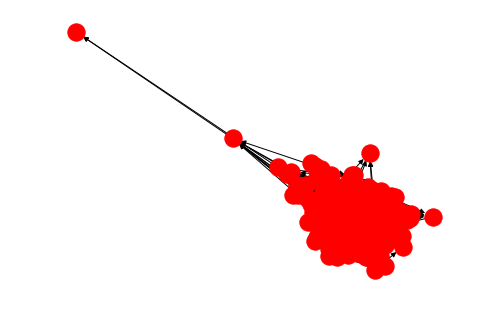

In [2]:
grph = generate_graph(num_nodes_min_max=[200, 250], directed=True, rate=0.02) # Big shallow graph
nx.draw(grph)

Text(0.5, 1.0, 'Histogram of -log-transition probabilities')

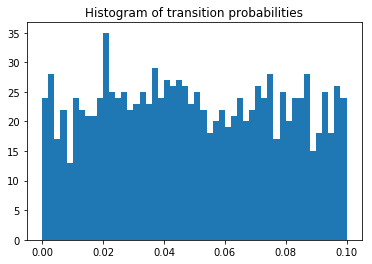

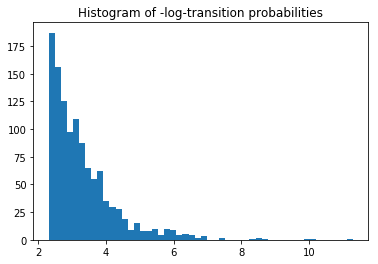

In [3]:
plt.figure()

plt.hist([i['transition_proba'] for i in list(grph.edges.values())], bins=50)
plt.title("Histogram of transition probabilities")

plt.figure()

plt.hist([i['log_transition_proba'] for i in list(grph.edges.values())], bins=50)
plt.title("Histogram of -log-transition probabilities")

In [4]:
s = pmia(grph, 10, THETA, tqdm_function=tqdm)

In [5]:
s

[139, 84, 118, 172, 15, 219, 198, 42, 151, 207]

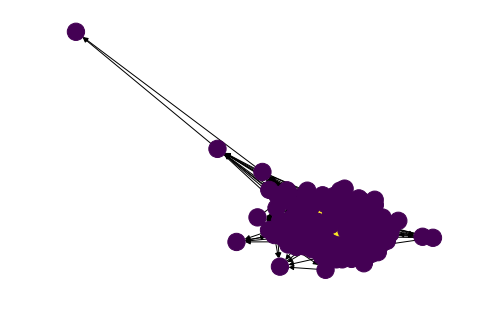

In [6]:
nx.draw(grph, node_color=[(10 if i in s else 9) for i in grph.nodes])

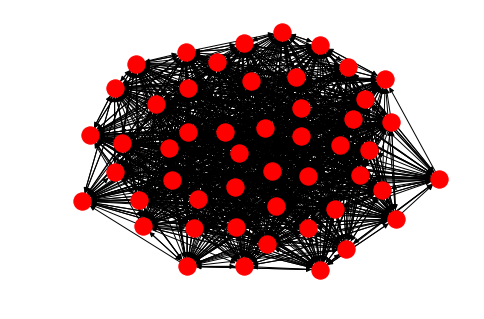

In [7]:
grph = generate_graph(num_nodes_min_max=[50, 55], directed=True, rate=0.6) # Small dense graph
nx.draw(grph)

Text(0.5, 1.0, 'Histogram of -log-transition probabilities')

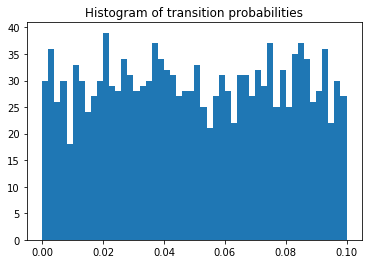

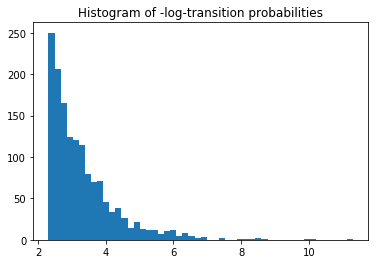

In [8]:
plt.figure()

plt.hist([i['transition_proba'] for i in list(grph.edges.values())], bins=50)
plt.title("Histogram of transition probabilities")

plt.figure()

plt.hist([i['log_transition_proba'] for i in list(grph.edges.values())], bins=50)
plt.title("Histogram of -log-transition probabilities")

In [9]:
s = pmia(grph, 10, THETA, tqdm_function=tqdm)

In [10]:
s

[41, 40, 6, 23, 29, 27, 43, 3, 26, 34]

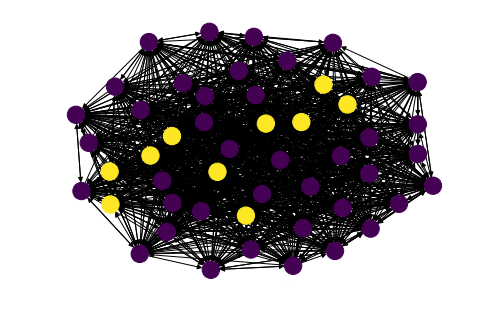

In [11]:
nx.draw(grph, node_color=[(10 if i in s else 9) for i in grph.nodes])

In [43]:
log_transition_proba=list(grph.edges.values())
c=0
dict=[]
for j in grph.nodes: 
    degree=0
    for i in range(len(list(grph.edges(j)))): 
        degree+=log_transition_proba[c+i]['log_transition_proba']
    dict.append(degree)
    c+=i
dict=np.array(dict)
S=np.argsort(dict)

In [35]:
kaka=list(grph.edges.values())
print(len(kaka))

1480


In [39]:
len(grph.edges())

1480

In [44]:
print(S)

[38 35 28 39 12 20 11 48  3 13 16 31  2 37  1 32 46 34 30 42 44 27 17 21
 45 10 49 22 41  7  9 19  4 43  0 14 47 40 36 33  8  6  5 26 18 29 15 23
 24 25]
